# Including mean return and variance into the risk parity formulation

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

In [3]:
import riskparityportfolio as rp
import numpy as np

In this notebook, we will check out the necessary interface to take into account the mean return and the variance while optimizing risk parity portfolios.

## Adding the mean return

**riskparity.py** allows users to account for the mean return of the designed portfolio, i.e., we solve the following optimization problem:

\begin{array}{ll}
 \underset{\mathbf{w}}{\textsf{minimize}} &
 R(\mathbf{w}) - \alpha \mathbf{w}^{\top}\boldsymbol{\mu}\\
 \textsf{subject to} & \mathbf{w} \geq \mathbf{0}, \mathbf{1}^\top\mathbf{w} = 1
\end{array}

In this notebook, we will construct the Mean Return x Risk Concentration profile for a simple universe with three assets. Like in the previous notebook, let's assume their covariance matrix, mean vector, and our budget vector are as follows:

$$\boldsymbol{\Sigma} = \left[
\begin{array}{ccc}
 1.0000 &  0.0015 & -0.0119\\
 0.0015 &  1.0000 & -0.0308\\
-0.0119 & -0.0308 &  1.0000
\end{array}
\right]$$

$$\boldsymbol{\mu} = \left[
\begin{array}{c}
 0.1837 \\
 0.3465 \\
 0.5210
\end{array}
\right]$$

$$\mathbf{b} = \left[
\begin{array}{c}
 0.1594 \\
 0.0126 \\
 0.8280
\end{array}
\right]$$

In [4]:
Sigma = np.vstack((np.array((1.0000, 0.0015, -0.0119)),
                   np.array((0.0015, 1.0000, -0.0308)),
                   np.array((-0.0119, -0.0308, 1.0000))))

In [5]:
Sigma

array([[ 1.    ,  0.0015, -0.0119],
       [ 0.0015,  1.    , -0.0308],
       [-0.0119, -0.0308,  1.    ]])

In [6]:
mu = np.array([0.1837, 0.3465, 0.5210])

In [7]:
mu

array([0.1837, 0.3465, 0.521 ])

In [8]:
b = np.array((0.1594, 0.0126, 0.8280))

In [9]:
b

array([0.1594, 0.0126, 0.828 ])

In [10]:
my_portfolio = rp.RiskParityPortfolio(covariance=Sigma, budget=b)

In [11]:
risk_parity = []
mean_return = []
for alpha in 10 ** np.arange(-5, 0, .25):
    my_portfolio.add_mean_return(alpha=alpha, mean=mu)
    my_portfolio.design()
    risk_parity.append(my_portfolio.risk_concentration.evaluate())
    mean_return.append(my_portfolio.mean_return)

/Users/mirca/opt/miniconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:120: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
  1%|          | 4/500 [00:00<00:05, 92.90it/s]


Text(0.5, 0, 'risk parity')

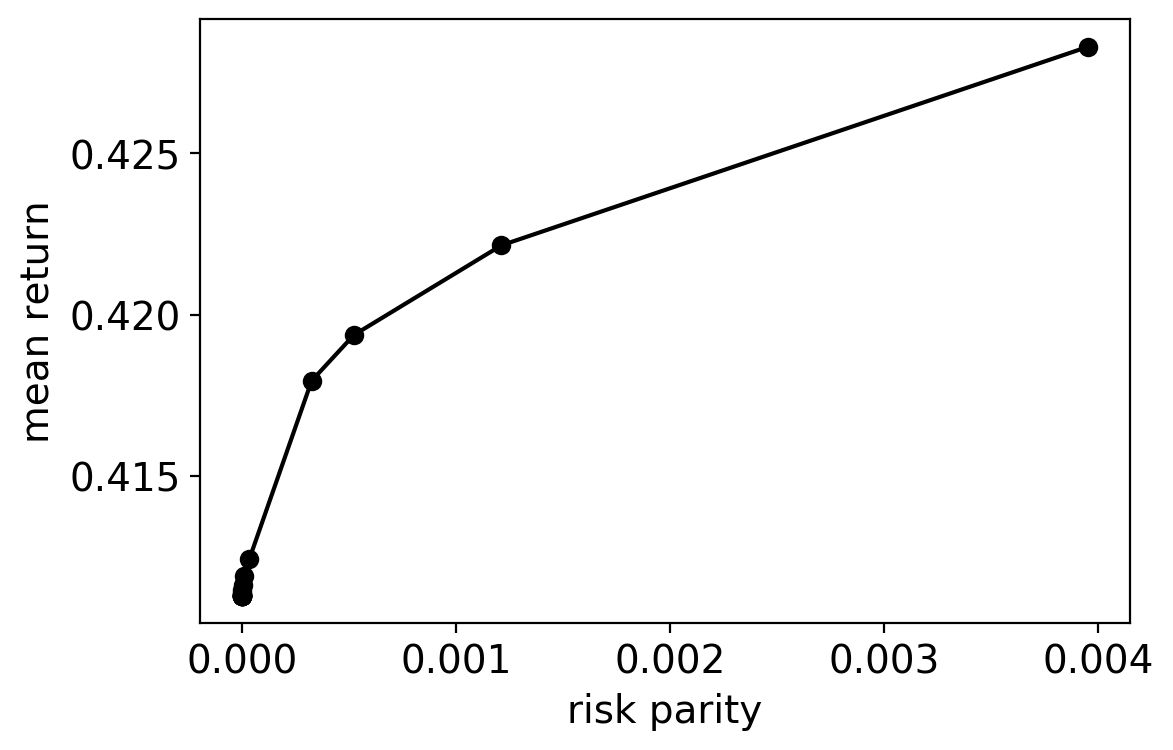

In [12]:
plt.plot(risk_parity, mean_return, 'ko')
plt.plot(risk_parity, mean_return, 'k-')
plt.ylabel("mean return")
plt.xlabel("risk parity")

## Adding the variance

Likewise, **riskparity.py** allows users to include the variance of the portfolio into the objective function:

\begin{array}{ll}
 \underset{\mathbf{w}}{\textsf{minimize}} &
 R(\mathbf{w}) + \lambda \mathbf{w}^{\top}\boldsymbol{\Sigma}\mathbf{w}\\
 \textsf{subject to} & \mathbf{w} \geq \mathbf{0}, \mathbf{1}^\top\mathbf{w} = 1
\end{array}

Let's also investigate the Volatility x Risk Concentration profile using the same parameters as in the previous example.

In [13]:
my_portfolio = rp.RiskParityPortfolio(covariance=Sigma, budget=b)

In [14]:
risk_parity = []
volatility = []
for lmd in 10 ** np.arange(-5, 0, .25):
    my_portfolio.add_variance(lmd=lmd)
    my_portfolio.design()
    risk_parity.append(my_portfolio.risk_concentration.evaluate())
    volatility.append(my_portfolio.volatility)

  1%|▏         | 7/500 [00:00<00:03, 140.67it/s]


Text(0.5, 0, 'risk parity')

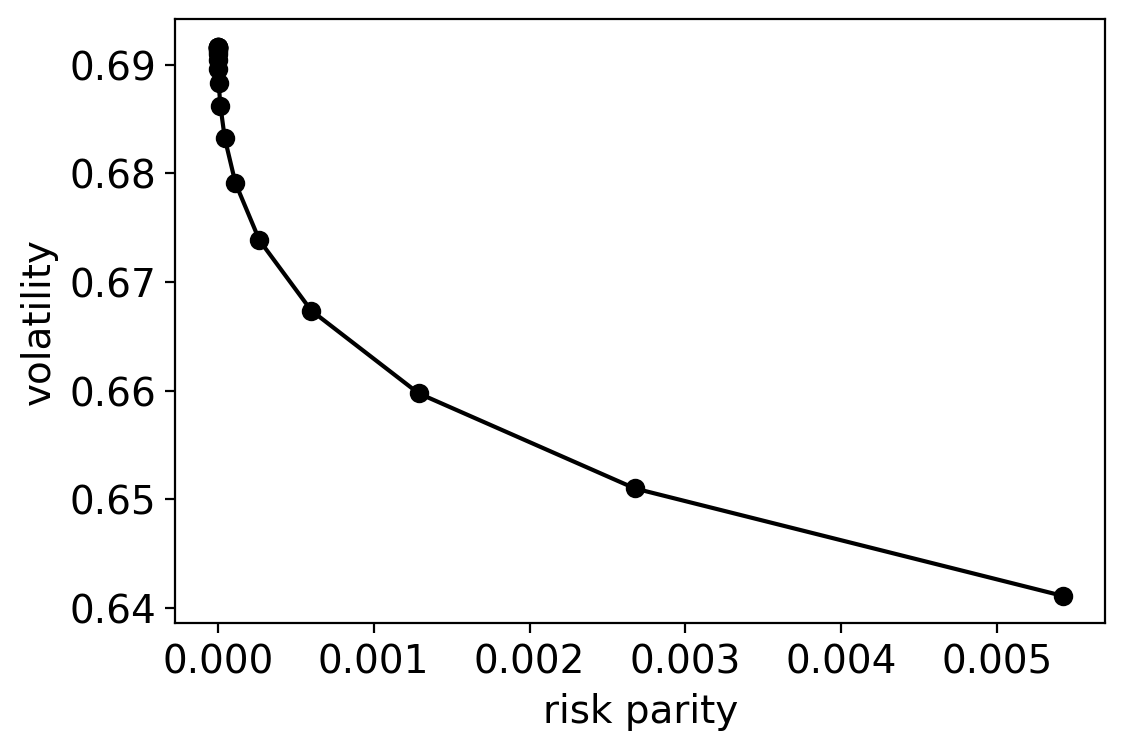

In [15]:
plt.plot(risk_parity, volatility, 'ko')
plt.plot(risk_parity, volatility, 'k-')
plt.ylabel("volatility")
plt.xlabel("risk parity")